# Bike Case Study

asfasfasf

## Introduction
adfasdfas

## Goal
afafas

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_palette('muted')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the max columns to none to see all the columns & rows in dataset

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
bike_original = pd.read_csv("day.csv")
bike_original.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_original.shape

(730, 16)

In [5]:
bike_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_original.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# check for null values in rows

# check for null values in columns

bike_original.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# duplicate data check

In [9]:
bike = bike_original.copy()
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# delete unnecessary columns which are not required for analysis
# instant, dteday, casual and registered

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Update values for some of the enumerated data types for analysis and readability

bike.season = bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

# map year ??

bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

bike.weathersit = bike.weathersit.map({1:'clear',2:'mist',3:'light_snow_rain',4:'heavy_snow_rain'})

bike.head(10)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thu,1,clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,clear,6.184153,7.54440,48.2917,14.958889,1321


In [12]:
# Univariate Analysis
# Bivariate Analysis
# Visualization

bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [13]:
num_cols=["temp", "atemp", "hum", "windspeed", "cnt"]

cat_cols=["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

## EDA

## Univariate Analysis

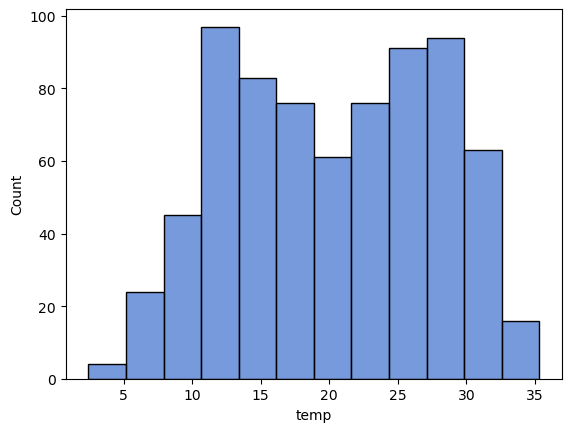

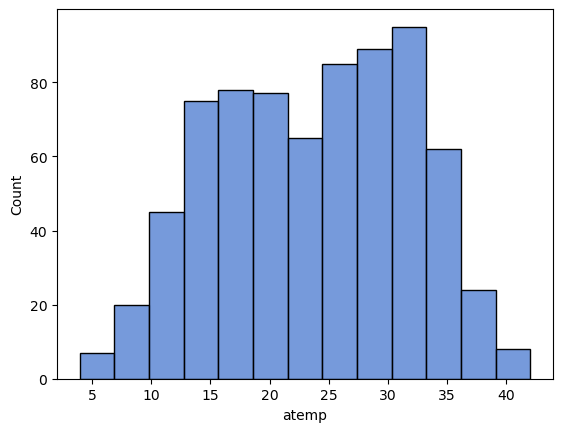

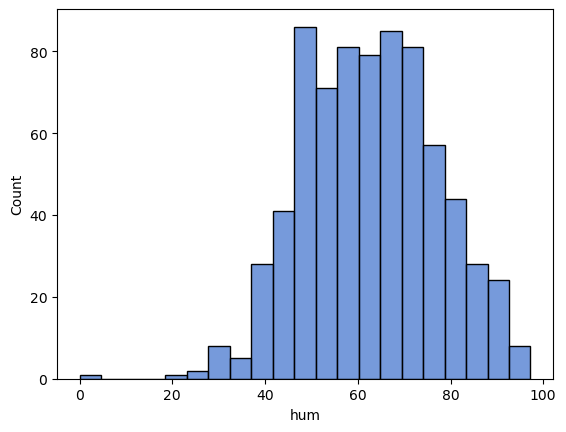

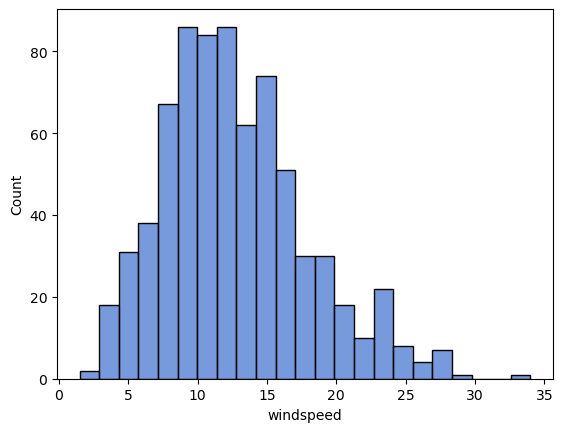

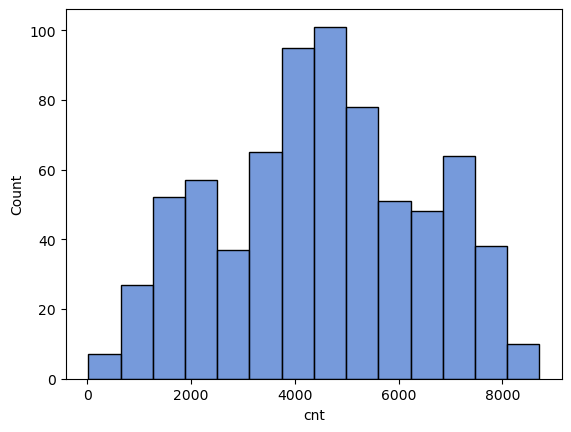

In [14]:
for i in num_cols:
    sns.histplot(x=bike[i])
    plt.show()

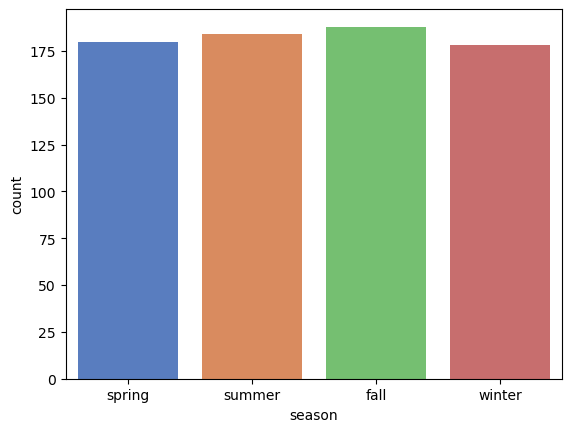

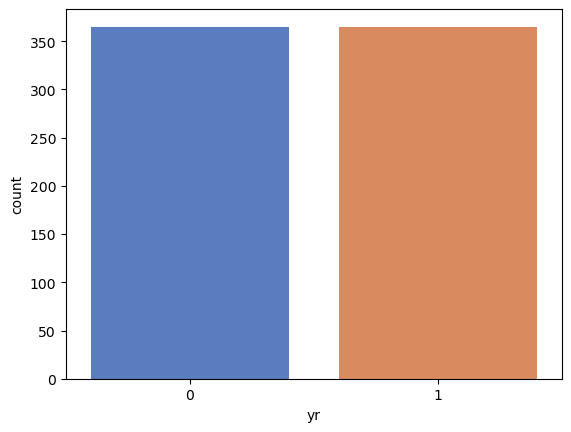

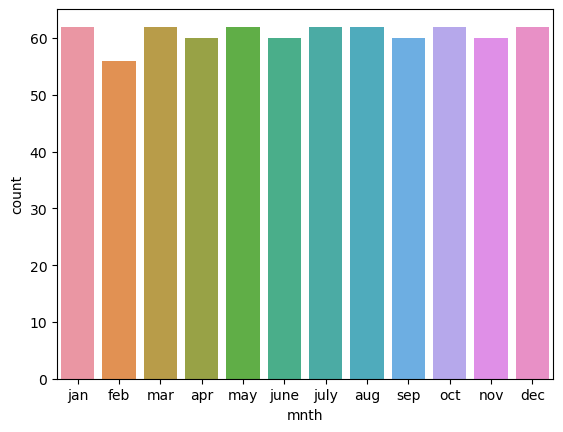

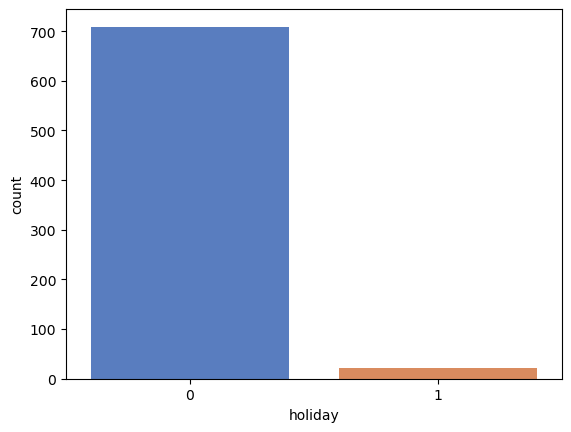

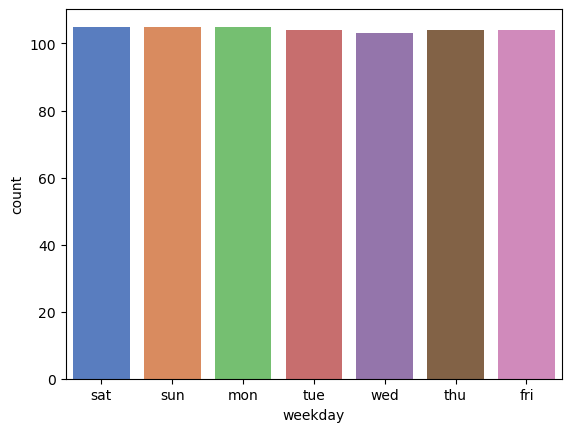

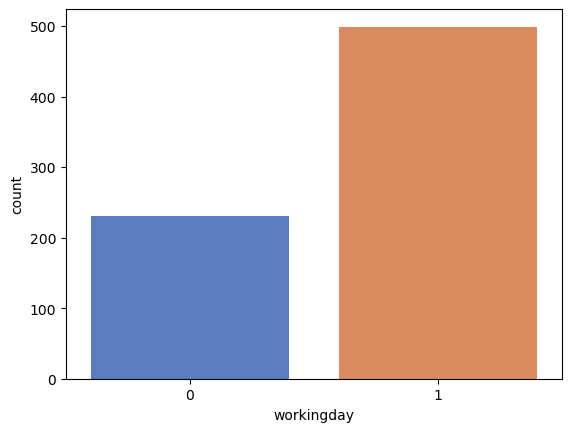

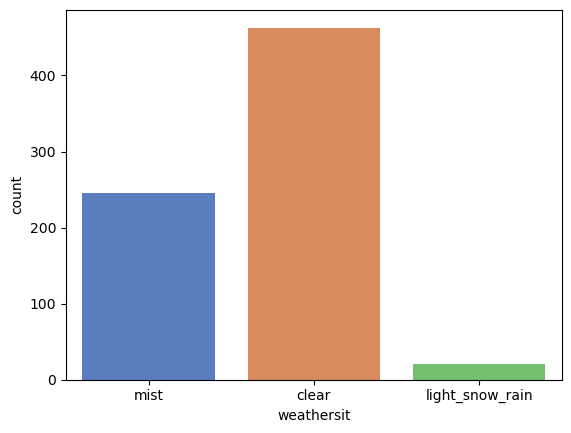

In [15]:
for i in cat_cols:
    sns.countplot(x=bike[i])
    plt.show()

## Bivariate Analysis

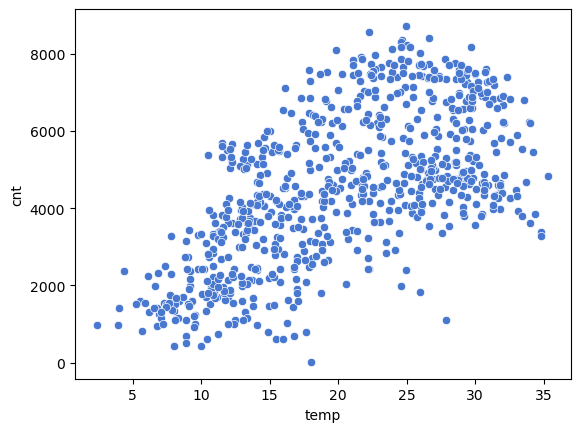

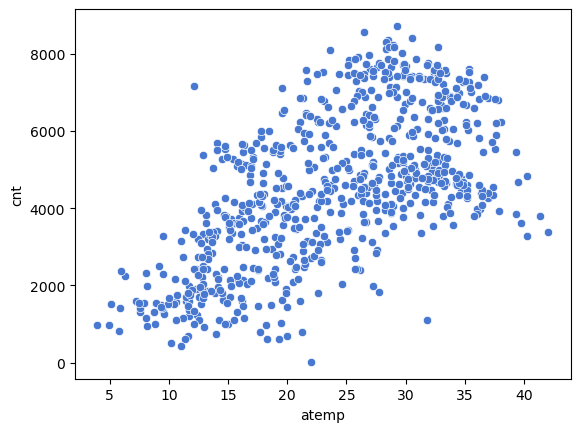

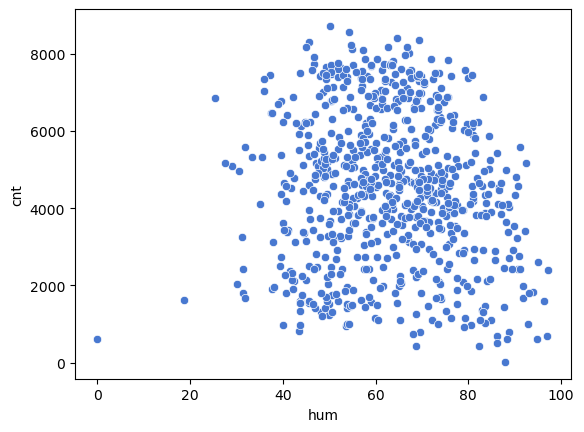

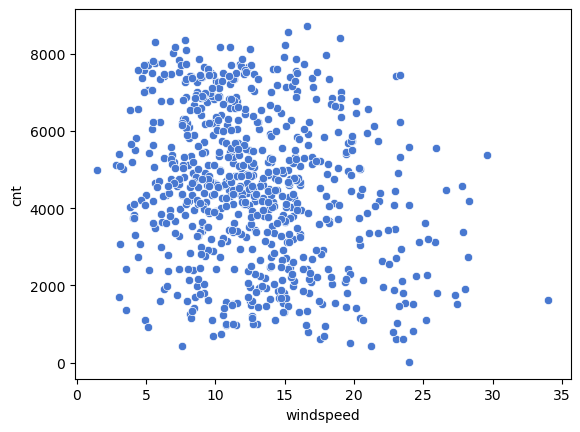

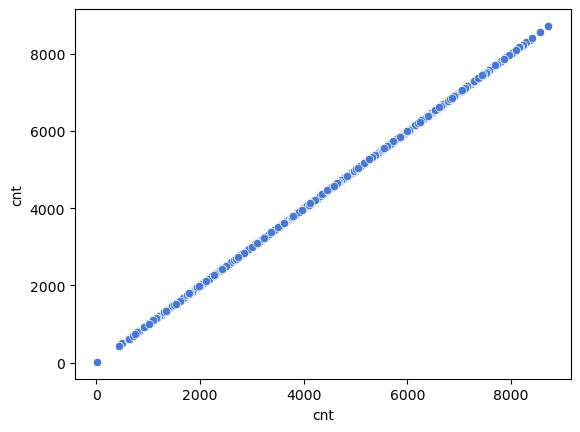

In [16]:
for i in num_cols:
    sns.scatterplot(x=bike[i], y=bike["cnt"])
    plt.show()

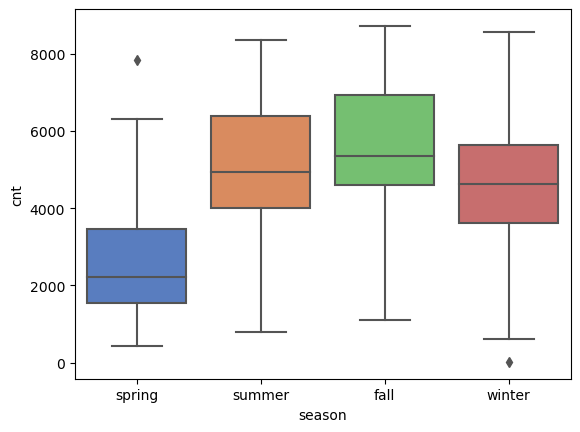

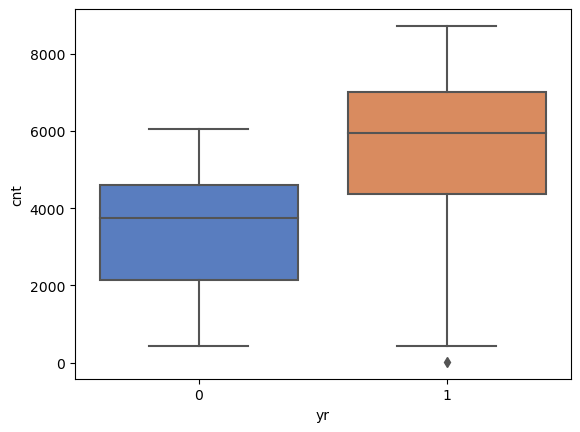

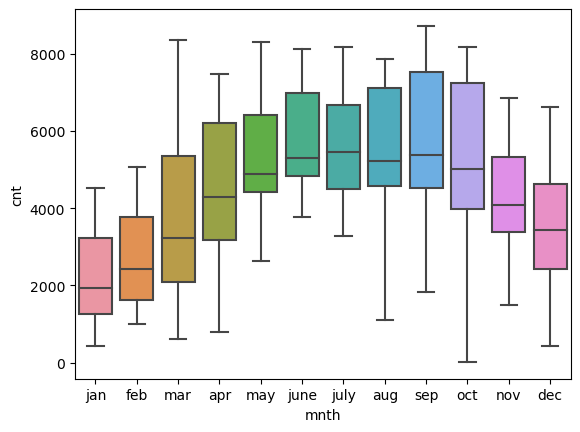

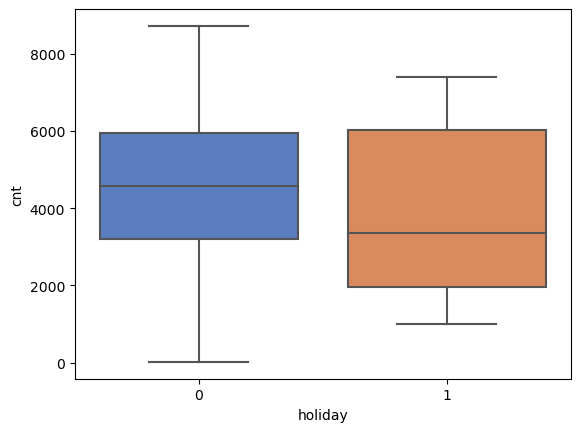

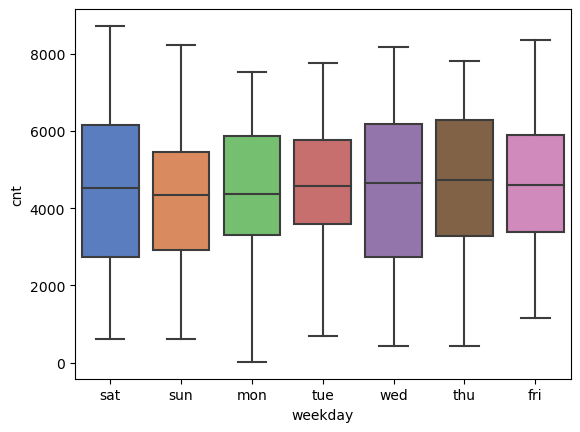

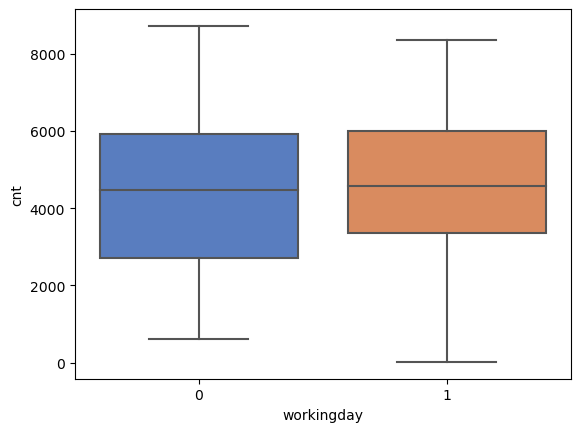

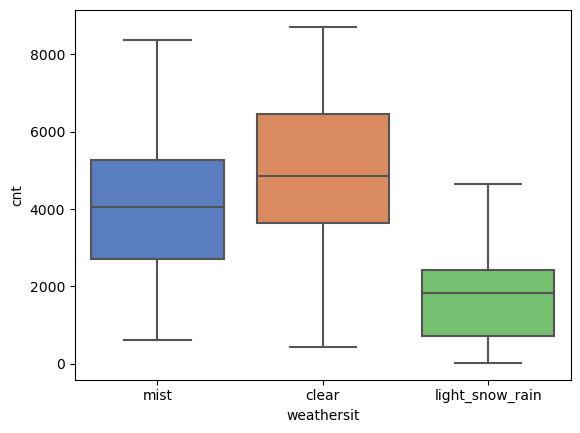

In [17]:
for i in cat_cols:
    sns.boxplot(x=bike[i], y=bike["cnt"])
    plt.show()

## Pre-processing step

### Dummy Variable creation (One Hot Encoding) 

In [18]:
bike[cat_cols].nunique # only for non binary categorical columns

<bound method DataFrame.nunique of      season  yr  mnth  holiday weekday  workingday       weathersit
0    spring   0   jan        0     sat           0             mist
1    spring   0   jan        0     sun           0             mist
2    spring   0   jan        0     mon           1            clear
3    spring   0   jan        0     tue           1            clear
4    spring   0   jan        0     wed           1            clear
5    spring   0   jan        0     thu           1            clear
6    spring   0   jan        0     fri           1             mist
7    spring   0   jan        0     sat           0             mist
8    spring   0   jan        0     sun           0            clear
9    spring   0   jan        0     mon           1            clear
10   spring   0   jan        0     tue           1             mist
11   spring   0   jan        0     wed           1            clear
12   spring   0   jan        0     thu           1            clear
13   spring  

In [19]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
season_dummy = pd.get_dummies(bike.season,drop_first=True,dtype=int)

In [21]:
bike = pd.concat([bike,season_dummy],axis=1)

In [22]:
bike.drop(['season'], axis = 1, inplace = True)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [23]:
mnth_dummy = pd.get_dummies(bike.mnth,drop_first=True,dtype=int)
bike = pd.concat([bike,mnth_dummy],axis=1)
bike.drop(['mnth'], axis = 1, inplace = True)
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
weekday_dummy = pd.get_dummies(bike.weekday,drop_first=True,dtype=int)
bike = pd.concat([bike,weekday_dummy],axis=1)
bike.drop(['weekday'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
weathersit_dummy = pd.get_dummies(bike.weathersit,drop_first=True,dtype=int)
bike = pd.concat([bike,weathersit_dummy],axis=1)
bike.drop(['weathersit'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
bike.shape

(730, 30)

## Test-Train split

In [28]:
X = bike.drop(["cnt"], axis = 1)
y = bike["cnt"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [30]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light_snow_rain,mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Scaling 

In [31]:
# Standard scaling

X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

## Feature scaling

In [32]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15) 

selector=selector.fit(X_train,y_train) 
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [33]:
# Check which all columns got selected
X_train.columns[selector.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'light_snow_rain',
       'mist'],
      dtype='object')

In [34]:
selected_features = X_train.columns[selector.support_]
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [35]:
# Building the linear model 

import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [36]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          7.31e-192
Time:                        19:18:14   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.266    131.072      0.000    4423.979    4558.628
yr               1001.3368     34.898     28.693      0.000     932.770    1069.903
holiday          -122.4457     32.941     -3.717      0.000    -187.166     -57.725
workingday         54.2112     19.357      2.801      0.005      16.179      92.243
temp             1036.6669     65.218     15.895      0.000     908.529    1164.805
hum              -205.1936     47.363     -4.332      0.000    -298.251    -112.136
windspeed        -266.7696     37.511     -7.112      0.000    -340.470    -193.069
spring           -205.8099     76.861     -2.678      0.008    -356.824     -54.796
summer            201.9132     55.555      3.634      0.000      92.761     311.065
winter            378.2388     64.127      5.898      0.000     252.245     504.232
july             -126.6372     41.835     -3.027      0.003    -208.833     -44.441
sep               193.3369     39.059      4.950      0.000     116.596     270.078
sat                72.1211     25.885      2.786      0.006      21.263     122.979
sun               -91.8521     26.483     -3.468      0.001    -143.885     -39.819
light_snow_rain  -360.4550     38.338     -9.402      0.000    -435.780    -285.130
mist             -234.1803     42.977     -5.449      0.000    -318.620    -149.741
==============================================================================
Omnibus:                       64.763   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.557
Skew:                          -0.662   Prob(JB):                     1.01e-34
Kurtosis:                       5.367   Cond. No.                     2.19e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.27e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
# Drop all the features whose p-values are greater than 0.05
# Since all features have p-values less than 0.05, then we are good here

In [38]:
# Independent features should not have correlation with each other

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,1.035215
1,holiday,inf
2,workingday,inf
3,temp,3.615446
4,hum,1.906795
5,windspeed,1.196046
6,spring,5.021533
7,summer,2.623422
8,winter,3.495427
9,july,1.487669


In [39]:
# Drop features which have VIF value greater than 5

X_train_sm=X_train_sm.drop(["sat"],axis=1)
X_test_sm=X_test_sm.drop(["sat"],axis=1)

In [40]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          7.31e-192
Time:                        19:18:14   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.266    131.072      0.000    4423.979    4558.628
yr               1001.3368     34.898     28.693      0.000     932.770    1069.903
holiday          -153.8576     36.778     -4.183      0.000    -226.117     -81.598
workingday        -39.0685     45.395     -0.861      0.390    -128.259      50.122
temp             1036.6669     65.218     15.895      0.000     908.529    1164.805
hum              -205.1936     47.363     -4.332      0.000    -298.251    -112.136
windspeed        -266.7696     37.511     -7.112      0.000    -340.470    -193.069
spring           -205.8099     76.861     -2.678      0.008    -356.824     -54.796
summer            201.9132     55.555      3.634      0.000      92.761     311.065
winter            378.2388     64.127      5.898      0.000     252.245     504.232
july             -126.6372     41.835     -3.027      0.003    -208.833     -44.441
sep               193.3369     39.059      4.950      0.000     116.596     270.078
sun              -161.6601     44.313     -3.648      0.000    -248.724     -74.596
light_snow_rain  -360.4550     38.338     -9.402      0.000    -435.780    -285.130
mist             -234.1803     42.977     -5.449      0.000    -318.620    -149.741
==============================================================================
Omnibus:                       64.763   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.557
Skew:                          -0.662   Prob(JB):                     1.01e-34
Kurtosis:                       5.367   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# workingday needs to be dropped

X_train_sm=X_train_sm.drop(['workingday'],axis=1)
X_test_sm=X_test_sm.drop(['workingday'],axis=1)

In [42]:
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          7.13e-193
Time:                        19:18:14   Log-Likelihood:                -4117.2
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     497   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.257    131.106      0.000    4423.997    4558.610
yr               1000.2750     34.867     28.688      0.000     931.769    1068.781
holiday          -143.3016     34.663     -4.134      0.000    -211.406     -75.197
temp             1035.8066     65.194     15.888      0.000     907.717    1163.896
hum              -206.6691     47.320     -4.367      0.000    -299.641    -113.698
windspeed        -265.6536     37.479     -7.088      0.000    -339.291    -192.016
spring           -205.6068     76.841     -2.676      0.008    -356.580     -54.634
summer            201.6420     55.540      3.631      0.000      92.521     310.763
winter            379.2373     64.100      5.916      0.000     253.298     505.177
july             -125.9652     41.817     -3.012      0.003    -208.125     -43.805
sep               193.5988     39.047      4.958      0.000     116.881     270.317
sun              -137.8632     34.618     -3.982      0.000    -205.880     -69.847
light_snow_rain  -359.9429     38.324     -9.392      0.000    -435.239    -284.647
mist             -233.5047     42.959     -5.436      0.000    -317.908    -149.102
==============================================================================
Omnibus:                       61.485   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.544
Skew:                          -0.619   Prob(JB):                     4.55e-34
Kurtosis:                       5.383   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.033921
2,holiday,1.021841
3,temp,3.614596
4,hum,1.904296
5,windspeed,1.194617
6,spring,5.021486
7,summer,2.623337
8,winter,3.494283
9,july,1.487151


In [44]:
# ALL VIF values are less than 5 and p values are less than 0.05
# we can have the linear regression model/line of best fit, y = mx + c

In [45]:
# Prediction on the test data
res3.predict(X_test_sm)

184    3504.839905
535    7888.485534
299    3489.183692
221    5278.828831
152    5291.181399
404    3860.723010
198    4378.303042
171    3914.594579
512    6324.143018
200    4782.294189
509    7005.344996
559    5826.091120
109    4366.289543
467    6124.674058
339    1427.660840
589    7078.706749
222    5134.505386
40     1275.366956
682    5353.957616
453    5040.233306
606    7147.143905
265    5142.167533
510    6886.556102
19     1372.358208
117    3585.063744
423    4620.668669
614    7268.944299
163    4531.692234
630    7013.368837
191    4250.224393
572    6874.550243
662    6208.578855
264    4275.815220
625    5468.846948
325    1562.367684
114    4400.483603
218    4281.591923
678    6279.041587
24     1285.092579
432    3599.884244
395    4516.942095
48     3092.391816
684    5803.743406
203    5462.622356
450    5522.443317
538    6998.676740
73     1553.794659
269    5276.412043
710    5051.054260
98     2484.379210
530    6876.211242
173    4030.819202
418    4927.

In [46]:
# check the correlation coefficients to see which variables are highly correlated

#plt.figure(figsize = (16,10))
#sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
#plt.show()

In [47]:
# Residual Analysis

y_train_pred = res3.predict(X_train_sm) 

In [48]:
#

Text(0.5, 0, 'Errors')

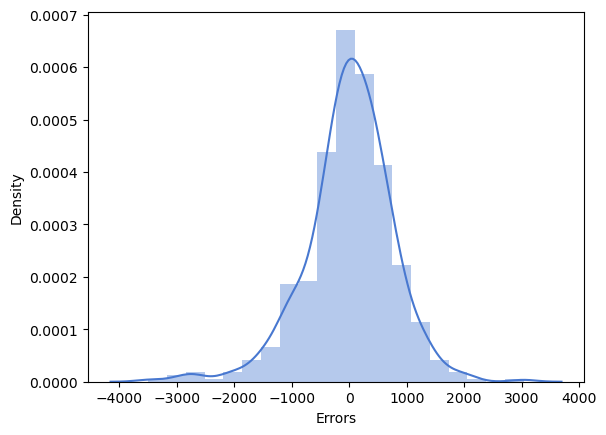

In [49]:
fig = plt.figure()
diff = y_train - y_train_pred
sns.distplot(diff, bins = 20)
plt.xlabel('Errors')

## Prediction and Evaluation on the Test Set